<ipython-input-5-6a741fa5ecb5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Crop'] = data['Crop'].str.lower()
<ipython-input-5-6a741fa5ecb5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Crop'] = label_encoder_crop.fit_transform(data['Crop'])
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the mode

Epoch 1/150
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6533 - loss: 0.7187 - val_accuracy: 0.7500 - val_loss: 0.5604
Epoch 2/150
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7546 - loss: 0.5525 - val_accuracy: 0.7626 - val_loss: 0.5334
Epoch 3/150
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7753 - loss: 0.5163 - val_accuracy: 0.7892 - val_loss: 0.4879
Epoch 4/150
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7880 - loss: 0.4884 - val_accuracy: 0.8037 - val_loss: 0.4602
Epoch 5/150
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7974 - loss: 0.4705 - val_accuracy: 0.7968 - val_loss: 0.4694
Epoch 6/150
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8051 - loss: 0.4558 - val_accuracy: 0.8192 - val_loss: 0.4278
Epoch 7/150
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8109 - loss: 0.4383 - val_accuracy: 0.8125 - val_loss: 0.4399
Epoch 8/150
3030/3030 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8178 -

1515/1515 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8802 - loss: 0.2870
Test Accuracy: 0.8809646368026733
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Classification Accuracy: 0.8809646607389681
Predicted Class: 2, Actual Class: 2
Predicted Class: 1, Actual Class: 1
Enter the crop you want to visualize (e.g., 'Rice'): banana
Knowledge base saved to knowledge_base.csv


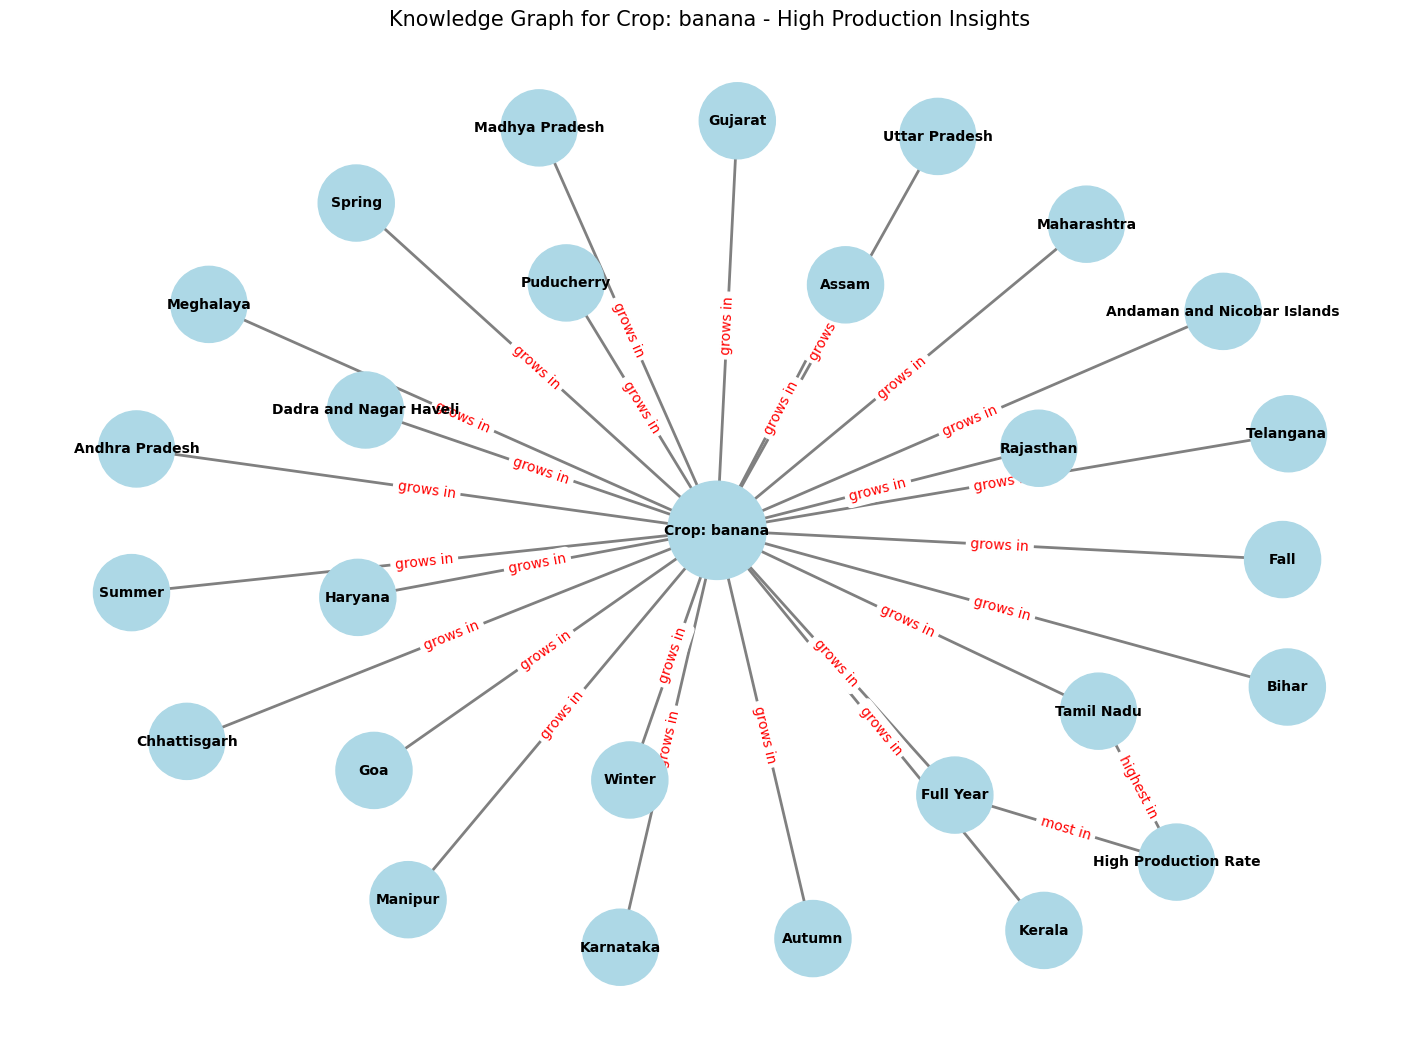

In [5]:
# Required Libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import csv

# Load the dataset
file_path = r"/content/Crop production dataset.csv"
data = pd.read_csv(file_path)

# Drop or fill missing values
data = data.dropna()

# Convert the 'Crop' column to lowercase to handle case insensitivity
data['Crop'] = data['Crop'].str.lower()

# Encode categorical variables 'Crop', 'Season2', 'State_Name', 'District_Name'
label_encoder_crop = LabelEncoder()
data['Crop'] = label_encoder_crop.fit_transform(data['Crop'])

label_encoder_season = LabelEncoder()
data['Season2'] = label_encoder_season.fit_transform(data['Season2'])

label_encoder_state = LabelEncoder()
data['State_Name'] = label_encoder_state.fit_transform(data['State_Name'])

label_encoder_district = LabelEncoder()
data['District_Name'] = label_encoder_district.fit_transform(data['District_Name'])

# Create classes based on production rate quantiles
data['Production_Class'] = pd.qcut(data['Production Rate'], q=3, labels=[0, 1, 2])

# Features and target
X = data[['Crop', 'Season2', 'Area', 'Crop_Year', 'State_Name', 'District_Name']]
y = data['Production_Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# One-hot encode the target variable for multi-class classification
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the multi-class classification model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Low, Medium, High
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Save the model
model.save('crop_production_multi_class_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Predict classes on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate classification accuracy
acc = accuracy_score(y_test_classes, y_pred_classes)
print(f"Classification Accuracy: {acc}")

# Print some predictions and their corresponding actual values
for i in range(2):
    print(f"Predicted Class: {y_pred_classes[i]}, Actual Class: {y_test_classes[i]}")

# User Input for Specific Crop
user_crop_input = input("Enter the crop you want to visualize (e.g., 'Rice'): ").strip().lower()

# Try encoding the input crop
try:
    user_crop_encoded = label_encoder_crop.transform([user_crop_input])[0]
except ValueError:
    print("The crop you entered is not in the dataset. Please try again.")
    exit()

# Filter the data for the specific crop
data_filtered = data[data['Crop'] == user_crop_encoded]

# Determine the state with the highest production for the crop
highest_production_state = data_filtered.groupby('State_Name')['Production Rate'].sum().idxmax()
highest_production_state_name = label_encoder_state.inverse_transform([highest_production_state])[0]

# Determine the season with the highest production for the crop
highest_production_season = data_filtered.groupby('Season2')['Production Rate'].sum().idxmax()
highest_production_season_name = label_encoder_season.inverse_transform([highest_production_season])[0]


# KnowledgeBase Class with save_to_csv implementation
class KnowledgeBase:
    def __init__(self):
        self.graph = nx.Graph()

    def add_crop(self, crop_name):
        crop_node = f"Crop: {crop_name}"
        self.graph.add_node(crop_node, size=5000)
        return crop_node

    def add_relationship(self, crop_node, related_node, relationship):
        self.graph.add_node(related_node, size=3000)
        self.graph.add_edge(crop_node, related_node, label=relationship)

    def save_to_csv(self, file_path):
        # Prepare the data for saving
        data = []
        for u, v, data_dict in self.graph.edges(data=True):
            relationship = data_dict.get('label', 'unknown')
            data.append({'From': u, 'To': v, 'Relationship': relationship})

        # Save to CSV
        with open(file_path, mode='w', newline='') as file:
            writer = csv.DictWriter(file, fieldnames=['From', 'To', 'Relationship'])
            writer.writeheader()
            writer.writerows(data)

        print(f"Knowledge base saved to {file_path}")

    def visualize(self, crop_name, highest_state, highest_season):
        # Highlight high production nodes
        self.graph.add_node("High Production Rate", size=3000)
        self.graph.add_edge("High Production Rate", highest_state, label="highest in")
        self.graph.add_edge("High Production Rate", highest_season, label="most in")

        # Layout for visualization
        pos = nx.spring_layout(self.graph, k=0.5, seed=42)

        plt.figure(figsize=(14, 10))
        nx.draw(
            self.graph, pos, with_labels=True,
            node_size=[data['size'] for _, data in self.graph.nodes(data=True)],
            node_color="lightblue", font_size=10, font_color="black",
            font_weight="bold", edge_color="gray", width=2
        )

        # Draw edge labels
        edge_labels = nx.get_edge_attributes(self.graph, 'label')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_color="red")

        # Title for the graph
        plt.title(f"Knowledge Graph for Crop: {crop_name} - High Production Insights", fontsize=15)
        plt.show()

# Create the Knowledge Base
kb = KnowledgeBase()

# Add crop
crop_node = kb.add_crop(user_crop_input)

# Add relationships for states and seasons
for _, row in data_filtered.iterrows():
    state_name = label_encoder_state.inverse_transform([row['State_Name']])[0]
    season_name = label_encoder_season.inverse_transform([row['Season2']])[0]
    kb.add_relationship(crop_node, state_name, "grows in")
    kb.add_relationship(crop_node, season_name, "grows in")

# Save the knowledge base to a CSV file
kb.save_to_csv("knowledge_base.csv")

# Visualize the knowledge graph
kb.visualize(user_crop_input, highest_production_state_name, highest_production_season_name)
